# Basic Contrast Mechanisms

MRI contrast is a rich dimension of information and the variety of contrasts achieveable is arguably the main advantage of MRI.  This section introduces the fundamental techniques of $T_1$, T2, and proton density weighted contrasts, and magnetization preparation (e.g. inversion recovery).

![MRI is a modality with a multiple Contrasts](images/3DMagic.gif)

## Learning Goals

1. Describe how various types of MRI contrast are created
    * Describe how $T_1$, T2, and proton density weighted images are formed
    * Describe how inversion recovery works
1. Manipulate MRI sequence parameters to improve performance
    * Choose flip angle, TE, TR, and TI for desired contrast

## What determines $T_1$ and $T_2$ values?

$T_1$ and $T_2$ are intrinsic properties of materials that are determined by the molecular environment and structure, and provide a significant sources of tissue contrast.  While a precise understanding of what determines $T_1$ and $T_2$ requires quantum mechanics, typical patterns in these values can be described based on typical types of tissues found in the body.
human tissues can be approximately be divided into 4 classes of tissues that have similar $T_1$ and $T_2$ values:
1. Liquids/fluids
1. Solids (e.g. Cortical bone, tendons, fibrosis)
1. Fat
1. Proteinaceous materials (e.g. internal organs)

### $T_1$

$T_1$ is also known as the spin-lattice relaxation time.  $T_1$ is determined by the exchange of energy between spins and the surrounding "lattice" - the molecular structure around the spins.  The lattice is in constant motion, and will have characteristic motional frequencies. 
The most efficient transfer of energy occurs when the natural motional frequencies are near the Larmor frequency ($f_0 = \bar{\gamma} B_0$), and natural motional frequencies depend on physical states of tissues:

1. Liquids/fluids: **Longer $T_1$** due to higher natural motional frequencies of protons
1. Solids (e.g. Cortical bone, tendons, fibrosis): **Intermediate $T_1$** due to lower natural motional frequencies of protons
1. Fat (lipids): **Shorter $T_1$** since natural motion frequencies are similar to $f_0$
1. Proteinaceous materials (e.g. internal organs): **Intermediate $T_1$** due to lower natural motional frequencies of protons
1. Proteinaceous fluids (e.g. Edema): **Shorter $T_1$** since water protons lose freedom of motion due to macromolecules, so natural motion frequencies are similar to  $f_0$

### $T_2$

$T_2$ is also known as the spin-spin relaxation time.  $T_2$ is determined by coupling between adjacent spins.  This also includes the transfer of energy to the lattice that determines $T_1$, meaning that $T_2$ is always shorter that $T_1$.
Stronger coupling between spins leads to more microscopic dephasing and shorter $T_2$ values.

1. Liquids/fluids: **Longer $T_2$** due to sparsity between water molecules and limited interaction between protons within a water molecule
1. Solids (e.g. Cortical bone, tendons, fibrosis): **Shorter $T_2$** due to strong, fixed spin-spin coupling
1. Fat (lipids): **Intermediate $T_2$** due to intermediate coupling
1. Proteinaceous materials (e.g. internal organs): **Intermediate $T_2$** due to intermediate coupling

### Typical $T_1$ and $T_2$ values

#### 1.5 T

| Tissue                  | $T_1$ (ms) | $T_2$ (ms) |
|-------------------------|---------|---------|
| Brain white matter      | 790     | 90      |
| Brain gray matter       | 920     | 100     |
| Cerebrospinal fluid (CSF)| >4000    | ∼2000   |
| Blood (arterial)        | 1200    | 50      |
| Liver parenchyma        | 490     | 40      |
| Lung                    | 830     | 80      |
| Myocardium              | 870     | 60      |
| Skeletal muscle         | 870     | 50      |
| Lipids                  | 260     | 80      |

Source: [Handbook of MRI Pulse Sequences](https://www.sciencedirect.com/science/article/pii/B9780120928613500261#p961)

#### 3 T

| Tissue | $T_1$ [ms] | $T_2$ [ms] |
| --- | --- | --- |
| White Matter | 800 | 110 |
| Gray Matter | 1300 | 80 |
| CSF | 3700 | 1700 |
| Muscle | 1000 | 30 |
| Fat | 400 | 100 | 
| Liver | 800 | 40 |
| Cartilage | 1200 | 40 |

Sources: [MRI from Picture to Proton](https://www.cambridge.org/9781107011088), [MRI: The Basics](https://www.sciencedirect.com/science/article/pii/B9780123744861000024)

## TE and $T_2/T_2^*$

The transverse magnetization decays with $T_2$ (spin-echoes) or $T_2^*$ (gradient-echoes) once it is flipped by an RF pulse away from the z-axis.  Therefore, the $T_2/T_2^*$ contrast can be controlled by choosing the echo time (TE), which is the time between the center of the RF excitation pulse and the center of the data acquisition (when the center of k-space is acquired).  The signal is then proportional to

$$S_{GE} \propto M_0 \exp(-TE/T_2^*)$$

$$S_{SE} \propto M_0 \exp(-TE/T_2)$$

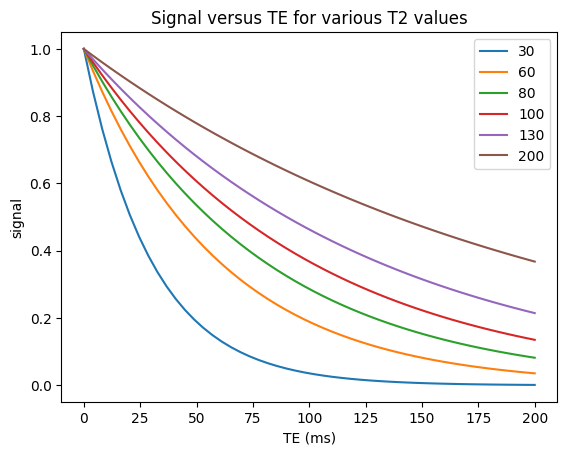

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TE contrast

TE = np.linspace(0, 200)  # ms
T2v = np.array([30, 60, 80, 100, 130, 200])
T2, TE_grid = np.meshgrid(T2v, TE)
M0 = np.ones_like(T2)

S_TE = M0 * np.exp(-TE_grid / T2)

plt.figure()
plt.plot(TE, S_TE)
plt.xlabel('TE (ms)')
plt.ylabel('signal')
plt.legend([str(t2) for t2 in T2v])
plt.title('Signal versus TE for various T2 values')
plt.show()

## TR and $T_1$

The longitudinal magnetization recovers with $T_1$ back to its equilibrium amplitude, $M_0$.  However, we do not directly measure the longitudinal magnetization.  In order to create $T_1$ contrast in the MR signal, repeated RF pulses are applied with a given repetition time (TR), such that there is incomplete recovery of the longitudinal magnetization.  Then, after excitation, incomplete recovery appears in the transverse magnetization, creating $T_1$ contrast.

### 90-degree flip angles

The simplest case is using 90-degree flip angles every TR, in which case 

$$S \propto M_0 (1- \exp(-TR/T_1) )$$

Illustrated in the first example below.  This shows that the magnetization reaches steady state in the 2nd TR.


### < 90-degree flip angles

For $T_1$-weighting, it is generally more efficient in terms of signal acqruied per time to use < 90-degree flip angles every TR, in which case 

$$S \propto M_0 \sin(\theta) \frac{1- \exp(-TR/T_1)}{1- \cos(\theta) \exp(-TR/T_1)}$$

Illustrated in this second example below.  This shows that the magnetization can take many TRs to reach steady state.  These acquisitions are commonly done to maximize signal for a typical $T_1$ range.  This is done by choosing using the so-called "Ernst angle", which is the flip angle that maximizes the signal for a given $T_1$ and $TR$:

$$\theta_{optimal} = \cos^{-1}(\exp(-TR/T_1))$$

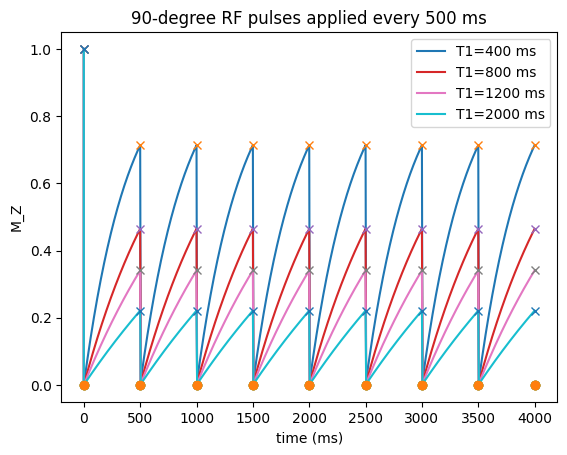

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# Signal evolution between TRs with 90-degree pulses

M0 = np.ones(4)  # 4 tissue types
T1 = np.array([400, 800, 1200, 2000])  # ms

NTR = 8
flip = 90  # degrees
TR = 500  # ms
Nt_per_TR = 100
t_per_TR = np.arange(1, Nt_per_TR + 1) * TR / Nt_per_TR
t_minus = np.arange(0, NTR + 1) * TR
t_plus = t_minus + 1

# magnetization before each RF pulse
Mz_minus = np.zeros((len(T1), NTR + 1))
# magnetization after each RF pulse
Mz_plus = np.zeros((len(T1), NTR + 1))

# initial condition
Mz_minus[:, 0] = M0
Mz_plus[:, 0] = Mz_minus[:, 0] * np.cos(np.deg2rad(flip))
t = [0, np.finfo(float).eps]
Mz_all = [Mz_minus[:, 0], Mz_plus[:, 0]]

for I in range(NTR):
    t = np.concatenate([t, t_per_TR + I * TR])
    for It in range(Nt_per_TR):
        Mz_all.append(
            Mz_plus[:, I] * np.exp(-t_per_TR[It] / T1) + M0 * (1 - np.exp(-t_per_TR[It] / T1))
        )
    Mz_minus[:, I + 1] = Mz_plus[:, I] * np.exp(-TR / T1) + M0 * (1 - np.exp(-TR / T1))
    Mz_plus[:, I + 1] = Mz_minus[:, I + 1] * np.cos(np.deg2rad(flip))

Mz_all = np.column_stack(Mz_all)

plt.figure()
for i in range(len(T1)):
    plt.plot(t, Mz_all[i, :], label=f"T1={T1[i]} ms")
    plt.plot(t_minus, Mz_minus[i, :], 'x')
    plt.plot(t_plus, Mz_plus[i, :], 'o')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('M_Z')
plt.title(f'{flip}-degree RF pulses applied every {TR} ms')
plt.show()

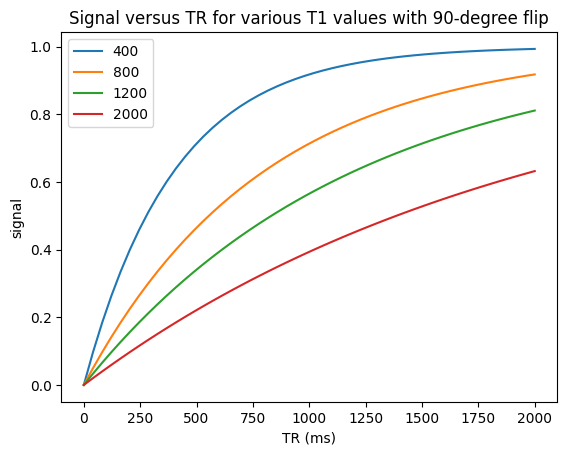

In [4]:
import numpy as np

import matplotlib.pyplot as plt

TR_vals = np.linspace(0, 2000)  # ms
T1v = np.array([400, 800, 1200, 2000])  # ms
T1, TR_grid = np.meshgrid(T1v, TR_vals)
M0 = np.ones_like(T1)

S_TR = M0 * (1 - np.exp(-TR_grid / T1))

plt.figure()
plt.plot(TR_vals, S_TR)
plt.xlabel('TR (ms)')
plt.ylabel('signal')
plt.legend([str(t1) for t1 in T1v])
plt.title(f'Signal versus TR for various T1 values with {flip}-degree flip')
plt.show()


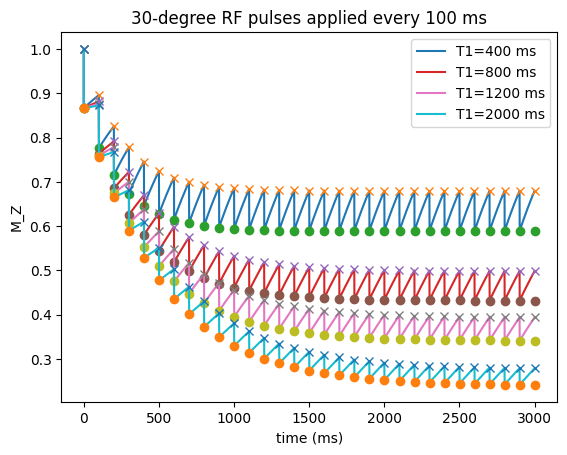

In [5]:
import numpy as np

import matplotlib.pyplot as plt

# Signal evolution between TRs with <90-degree pulses

M0 = np.ones(4)  # 4 tissue types
T1v = np.array([400, 800, 1200, 2000])  # ms

NTR = 30
flip = 30  # degrees
TR = 100  # ms
Nt_per_TR = 100
t_per_TR = np.arange(1, Nt_per_TR + 1) * TR / Nt_per_TR
t_minus = np.arange(0, NTR + 1) * TR
t_plus = t_minus + 1

# magnetization before each RF pulse
Mz_minus = np.zeros((len(T1v), NTR + 1))
# magnetization after each RF pulse
Mz_plus = np.zeros((len(T1v), NTR + 1))

# initial condition
Mz_minus[:, 0] = M0
Mz_plus[:, 0] = Mz_minus[:, 0] * np.cos(np.deg2rad(flip))
t = [0, np.finfo(float).eps]
Mz_all = [Mz_minus[:, 0], Mz_plus[:, 0]]

for I in range(NTR):
    t = np.concatenate([t, t_per_TR + I * TR])
    for It in range(Nt_per_TR):
        Mz_all.append(
            Mz_plus[:, I] * np.exp(-t_per_TR[It] / T1v) + M0 * (1 - np.exp(-t_per_TR[It] / T1v))
        )
    Mz_minus[:, I + 1] = Mz_plus[:, I] * np.exp(-TR / T1v) + M0 * (1 - np.exp(-TR / T1v))
    Mz_plus[:, I + 1] = Mz_minus[:, I + 1] * np.cos(np.deg2rad(flip))

Mz_all = np.column_stack(Mz_all)

plt.figure()
for i in range(len(T1v)):
    plt.plot(t, Mz_all[i, :], label=f"T1={T1v[i]} ms")
    plt.plot(t_minus, Mz_minus[i, :], 'x')
    plt.plot(t_plus, Mz_plus[i, :], 'o')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('M_Z')
plt.title(f'{flip}-degree RF pulses applied every {TR} ms')
plt.show()

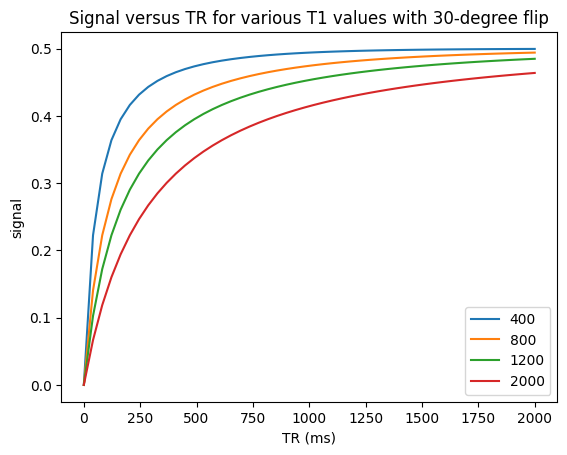

In [6]:
import numpy as np

import matplotlib.pyplot as plt

flip_angle = 30  # degrees
TR_vals = np.linspace(0, 2000, 50)  # ms, 50 points for smoothness
T1v = np.array([400, 800, 1200, 2000])  # ms

T1, TR_grid = np.meshgrid(T1v, TR_vals)
M0 = np.ones_like(T1)

S_TR = np.sin(np.deg2rad(flip_angle)) * M0 * (1 - np.exp(-TR_grid / T1)) / (1 - np.cos(np.deg2rad(flip_angle)) * np.exp(-TR_grid / T1))

plt.figure()
plt.plot(TR_vals, S_TR)
plt.xlabel('TR (ms)')
plt.ylabel('signal')
plt.legend([str(t1) for t1 in T1v])
plt.title(f'Signal versus TR for various T1 values with {flip_angle}-degree flip')
plt.show()

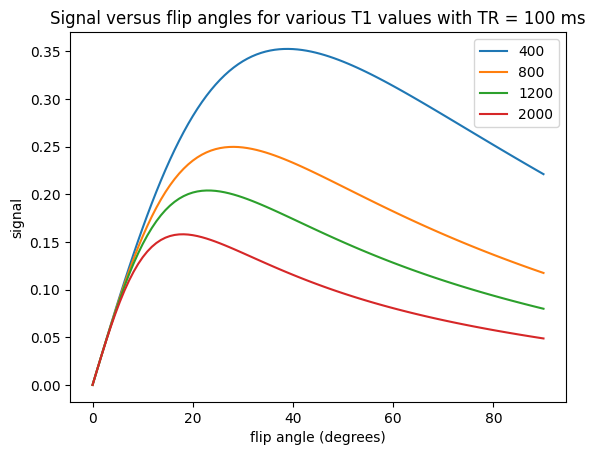

In [7]:
import numpy as np

import matplotlib.pyplot as plt

TR = 100
flip = np.linspace(0, 90, 100)  # degrees
T1v = np.array([400, 800, 1200, 2000])  # ms
T1, flip_grid = np.meshgrid(T1v, flip)
M0 = np.ones_like(T1)

S_flip = np.sin(np.deg2rad(flip_grid)) * M0 * (1 - np.exp(-TR / T1)) / (1 - np.cos(np.deg2rad(flip_grid)) * np.exp(-TR / T1))

plt.figure()
plt.plot(flip, S_flip)
plt.xlabel('flip angle (degrees)')
plt.ylabel('signal')
plt.legend([str(t1) for t1 in T1v])
plt.title(f'Signal versus flip angles for various T1 values with TR = {TR} ms')
plt.show()

## $T_1$, $T_2$ and Proton Density Weighting

By choosing the TE, TR and flip angle values in our pulse sequences and the relationships described above, we can create images that "weighted" by the MR properties of $T_1$, $T_2$, and proton density.  This means that the resulting images will have contrast between tissues that have different $T_1$, $T_2$ or proton density.

|         | Short TE | Long TE |
|---------|----------|---------|
| Short TR|    $T_1$-weighted      |     Not used    |
| Long TR |  PD-weighted        |      $T_2$/$T_2^*$-weighted   |


### $T_2$-weighting and $T_2^*$-weighting

To create $T_2$ weighting, the TE is chosen to be long enough such that the there are different amounts of transverse magnetization depending on the $T_2$ value.  For example, at TE = 80 ms we can expect to see good contrast between white matter ($T_2 \approx 60$ ms), gray matter ($T_2 \approx 80$ ms), and cerebrospinal fluid ($T_2 \approx 1500$ ms) in the brain (see simulations above).

The TR is chosen to be long relative to $T_1$ values.  This allows the net magnetization to fully recover each repetition, and thereby eliminating any $T_1$-weighting.

In $T_2$/$T_2^*$ weighting, longer $T_2$/$T_2^*$ tissues have higher signal than shorter $T_2$/$T_2^*$ tissues.

The difference between $T_2$ and $T_2^*$ weighting depends on the choice of pulse sequence: $T_2$-weighting comes from spin-echoes while $T_2^*$-weighting comes from gradient-echoes.   These are discussed later.  The same principle applies of choosing a long enough TE, and a long TR.

### $T_1$-weighting

To create $T_1$ weighting, the TR is chosen to be short enough such that there is incomplete recovery of the net magnetization each repetition.  This means that the signal acquired will depend on $T_1$.  For example. choosing a TR = 500 ms with a 90-degree flip angle we can expect to see contrast between fat ($T_1 \approx 400$ ms) and muscle ($T_1 \approx 1200$ ms)  (see simulations above).

For $T_1$-weighting, we also can use smaller flip angles and smaller TRs to boost the overall signal.  For example. choosing a TR = 200 ms with a 30-degree flip angle we can expect to see contrast between fat ($T_1 \approx 400$ ms) and muscle ($T_1 \approx 1200$ ms) but more overall signal (see simulations above).

The TE is chosen to be short relative to $T_2$ values.  This reduces $T_2$-weighting.

In $T_1$ weighting, shorter $T_1$ tissues have higher signal than longer $T_1$ tissues.

### PD-weighting

To create proton density (PD) weighting, we choose a short TE to reduce $T_2$-weighting and a long TR to reduce $T_1$-weighting.  This leaves the image contrast dependent on the proton density, which is captured in the equilibrium magnetization, $M_0$.

In PD weighting, higher PD tissues have higher signal than lower PD tissues.

Proton-density weighting can be achieved with short TRs when using very small flip angles.  This weighting applies up to a certain $TR/T_1$ ratio.  This can be seen in the following by zooming in on the low flip angle area from the plots above and noting that there is no difference between the signal for different $T_1$ values, meaning the $T_1$-weighting has been removed.

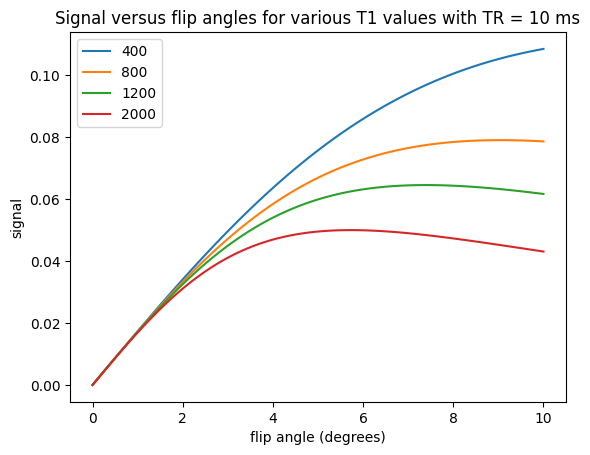

In [8]:
TR = 10
flip = np.linspace(0, 10, 100)  # degrees, 100 points for smoothness
T1v = np.array([400, 800, 1200, 2000])  # ms
T1, flip_grid = np.meshgrid(T1v, flip)
M0 = np.ones_like(T1)

S_flip = np.sin(np.deg2rad(flip_grid)) * M0 * (1 - np.exp(-TR / T1)) / (1 - np.cos(np.deg2rad(flip_grid)) * np.exp(-TR / T1))

plt.figure()
plt.plot(flip, S_flip)
plt.xlabel('flip angle (degrees)')
plt.ylabel('signal')
plt.legend([str(t1) for t1 in T1v])
plt.title(f'Signal versus flip angles for various T1 values with TR = {TR} ms')
plt.show()

## Inversion Recovery

Another way to create $T_1$ contrast are "Inversion Recovery" techniques.  These use a 180-degree inversion pulse, following by an Inversion Time $TI$ delay during which $T_1$ contrast is created.  Then the magnetization is excited with a 90-degree pulse.

This strategy is commonly used to null tissue types.  For example, so-called short-time inversion recovery (STIR) is used to null fat signals, while fluid attenuated inversion recovery (FLAIR) is used to null fluids.

$$S_{IR} \propto M_0 (1 - 2\exp(-TI/T_1) + \exp(-TR/T_1) )$$

The illustration below shows that the magnetization reaches steady state in the 2nd TR of inversion recovery.


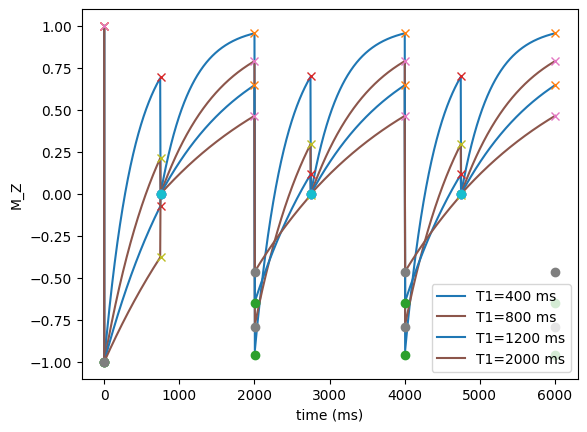

In [9]:
import numpy as np

import matplotlib.pyplot as plt

# Inversion Recovery

T1 = np.array([400, 800, 1200, 2000])  # ms
M0 = np.ones_like(T1)

NTR = 3
flip1 = 180  # degrees
flip2 = 90   # degrees
TR = 2000    # ms
TI = 750     # ms

dt = 5       # ms
t_per_TR = np.arange(dt, TR + dt, dt)

# magnetization before each RF pulse
Mz1_minus = np.zeros((len(T1), NTR + 1))
Mz2_minus = np.zeros((len(T1), NTR))

# magnetization after each RF pulse
Mz1_plus = np.zeros((len(T1), NTR + 1))
Mz2_plus = np.zeros((len(T1), NTR))

# time of RF pulses
t1_minus = np.arange(NTR + 1) * TR
t1_plus = t1_minus + 1
t2_minus = t1_minus[:-1] + TI
t2_plus = t1_plus[:-1] + TI

# initial condition
Mz1_minus[:, 0] = M0
Mz1_plus[:, 0] = Mz1_minus[:, 0] * np.cos(np.deg2rad(flip1))
Mz_all = [Mz1_minus[:, 0], Mz1_plus[:, 0]]
t = [0, np.finfo(float).eps]

for I in range(NTR):
    t = np.concatenate([t, t_per_TR + I * TR])
    # evolve for TI period after 180-pulse
    for It in np.where(t_per_TR < TI)[0]:
        Mz_all.append(Mz1_plus[:, I] * np.exp(-t_per_TR[It] / T1) + M0 * (1 - np.exp(-t_per_TR[It] / T1)))
    Mz2_minus[:, I] = Mz1_plus[:, I] * np.exp(-TI / T1) + M0 * (1 - np.exp(-TI / T1))
    Mz2_plus[:, I] = Mz2_minus[:, I] * np.cos(np.deg2rad(flip2))
    # evolve for the rest of TR after 90-pulse
    for It in np.where(t_per_TR >= TI)[0]:
        Mz_all.append(Mz2_plus[:, I] * np.exp(-(t_per_TR[It] - TI) / T1) + M0 * (1 - np.exp(-(t_per_TR[It] - TI) / T1)))
    Mz1_minus[:, I + 1] = Mz2_plus[:, I] * np.exp(-(TR - TI) / T1) + M0 * (1 - np.exp(-(TR - TI) / T1))
    Mz1_plus[:, I + 1] = Mz1_minus[:, I + 1] * np.cos(np.deg2rad(flip1))

Mz_all = np.column_stack(Mz_all)

plt.figure()
for i in range(len(T1)):
    plt.plot(t, Mz_all[i, :], label=f"T1={T1[i]} ms")
    plt.plot(t1_minus, Mz1_minus[i, :], 'x')
    plt.plot(t1_plus, Mz1_plus[i, :], 'o')
    plt.plot(t2_minus, Mz2_minus[i, :], 'x')
    plt.plot(t2_plus, Mz2_plus[i, :], 'o')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('M_Z')
plt.show()

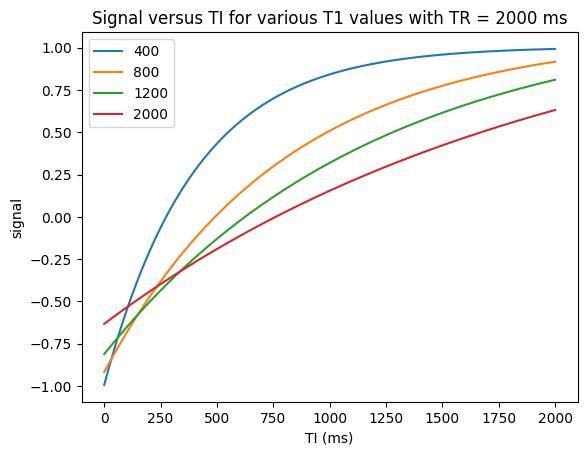

In [10]:
import numpy as np

import matplotlib.pyplot as plt

TR = 2000  # ms
TI = np.linspace(0, 2000, 200)  # ms, 200 points for smoothness
T1v = np.array([400, 800, 1200, 2000])  # ms
T1, TI_grid = np.meshgrid(T1v, TI)
M0 = np.ones_like(T1)

S_TI = M0 * (1 - 2 * np.exp(-TI_grid / T1) + np.exp(-TR / T1))

plt.figure()
plt.plot(TI, S_TI)
plt.xlabel('TI (ms)')
plt.ylabel('signal')
plt.legend([str(t1) for t1 in T1v])
plt.title(f'Signal versus TI for various T1 values with TR = {TR} ms')
plt.show()
